In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [2]:
# For Preparing Data
import os
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
import copy

# For Splitting Training & Validating data
from sklearn.model_selection import train_test_split

# Define Constants

In [3]:
TRAIN_IMG_DIR = "/kaggle/input/machathon-3/train_images/"
TEST_IMG_DIR = "/kaggle/input/machathon-3/test_images/"
TRAIN_CSV_PATH = "/kaggle/input/machathon-3/train_labels.csv"

IMAGE_WIDTH = 256
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3

# 1. Prepare Training Data

first load the csv file into a dataframe

In [4]:
df = pd.read_csv(TRAIN_CSV_PATH)
labels = df['label']
labels_list = []

chars = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك',
       'ل', 'م', 'ن','ه','و','ى', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for i, l in enumerate(labels):
    labels_list.append(l.split(" "))
    
    if '\u200d' in labels_list[i]:
        labels_list[i].remove('\u200d')

# print(labels_list[2322])
# char_labels = labels_list
# df['label'] = copy.deepcopy(labels_list) 

for i1, l in enumerate(labels_list):
    for i2, c in enumerate(l):
        current_vec = [0] * len(chars)
        if c in chars:
            index = chars.index(c)
            current_vec[index] = 1
            labels_list[i1][i2] = current_vec
        else:
            print("error")
        
df['en'] = labels_list

# new df from the column of lists
split_df = pd.DataFrame(df['en'].tolist(), columns=['en0', 'en1', 'en2','en3', 'en4', 'en5', 'en6'])

# concat df and split_df
df = pd.concat([df, split_df], axis=1)
    
df.drop('label',axis='columns', inplace=True)
df.drop('en',axis='columns', inplace=True)

empty_list = ["E"] * len(chars)

for column in df:
    for i, e in enumerate(df[column]):
        if e is None:
            df[column][i] = empty_list

# print(df['label'][2322])
# print(df['label'][4951])
# print(df['label'][5278])
df.head()

,img_name,en0,en1,en2,en3,en4,en5,en6
0,00000.jpg,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
1,00001.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
2,00002.jpg,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
3,00003.jpg,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
4,00004.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."


Have a look of a sample image from the train data

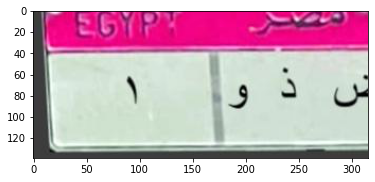

In [5]:
img_path = os.path.join(TRAIN_IMG_DIR, random.choice(df['img_name']))
img = load_img(img_path)
plt.imshow(img)

**1.1 Split Training & Validating Data**

Split the input data into training(80%) & validation(20%)

In [6]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

print("Shape of total dataframe: ", df.shape)
print("Shape of train dataframe: ", train_df.shape)
print("Shape of train dataframe: ", validate_df.shape)

Shape of total dataframe:  (5279, 8)
Shape of train dataframe:  (4223, 8)
Shape of train dataframe:  (1056, 8)


Now save new dataframes prop into variables for later use

In [7]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

**1.2 Data Augmentation**

1.2.1 Train Generator

In [8]:
train_datagen = ImageDataGenerator(
#     rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.4,1.2]
#     width_shift_range=0.05,
#     height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    TRAIN_IMG_DIR,
    x_col='img_name',
    y_col=["en0", "en1", "en2","en3", "en4", "en5", "en6"],
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='raw',
    batch_size=batch_size
)

Found 4223 validated image filenames.


1.2.2 Validation Generator

In [9]:
validate_datagen = ImageDataGenerator(rescale=1./255)

validate_generator = validate_datagen.flow_from_dataframe(
    validate_df,
    TRAIN_IMG_DIR,
    x_col='img_name',
    y_col=["en0", "en1", "en2","en3", "en4", "en5", "en6"],
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='raw',
    batch_size=batch_size
)

Found 1056 validated image filenames.


Now let's try train generator

In [10]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    TRAIN_IMG_DIR,
    x_col='img_name',
    y_col=["en0", "en1", "en2","en3", "en4", "en5", "en6"],
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='raw',
)

Found 1 validated image filenames.


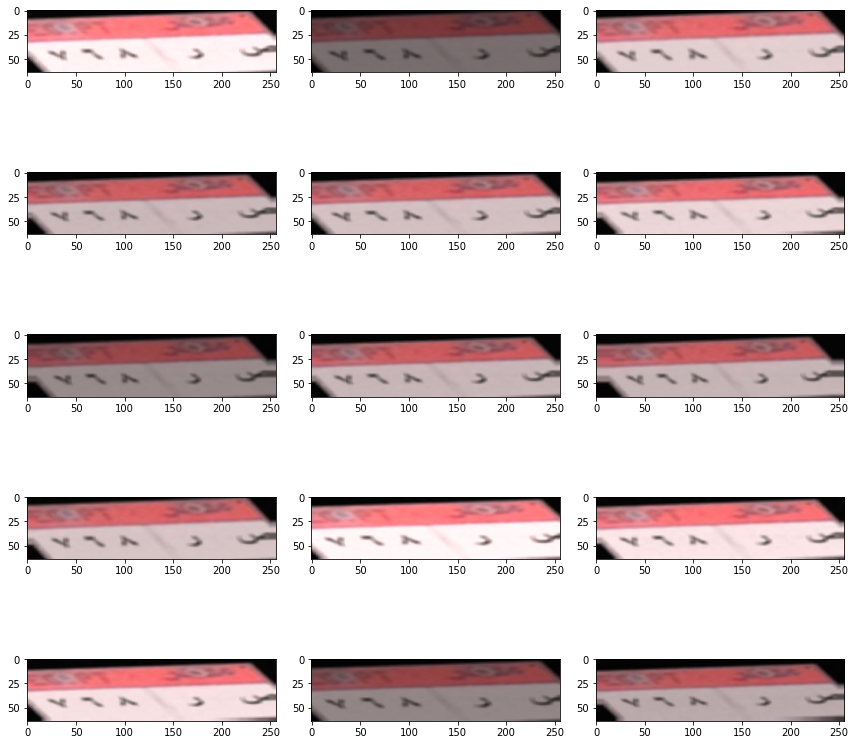

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 2. Build Model

# 3. Train Model

**3.1 Save Model Weights**

# 4. Virtualize Training

# 5. Prepare Testing Data

# 6. Test The Model

# 7. Virtualize Result